In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


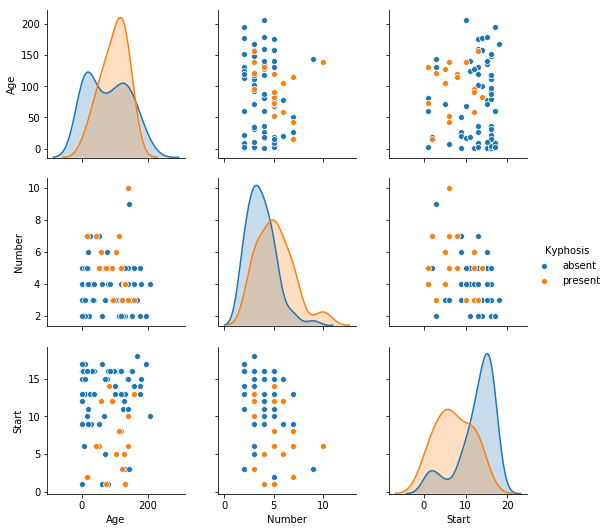

In [4]:
sns.pairplot(df,hue='Kyphosis')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier(criterion = 'entropy')

In [10]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
from IPython.display import Image

In [12]:
pred = dtree.predict(x_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [14]:
conf_mat = confusion_matrix(y_test,pred)

In [15]:
accu= accuracy_score(y_test,pred)

In [16]:
conf_mat,accu

(array([[17,  1],
        [ 4,  3]], dtype=int64), 0.8)

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.81      0.94      0.87        18
     present       0.75      0.43      0.55         7

   micro avg       0.80      0.80      0.80        25
   macro avg       0.78      0.69      0.71        25
weighted avg       0.79      0.80      0.78        25



In [18]:
print(confusion_matrix(y_test,pred))

[[17  1]
 [ 4  3]]


In [19]:
from IPython.display import Image
from sklearn.externals.six import StringIO

In [21]:
from sklearn.tree import export_graphviz
import pydot

In [22]:
features =list(df.columns[1:])

In [23]:
features

['Age', 'Number', 'Start']

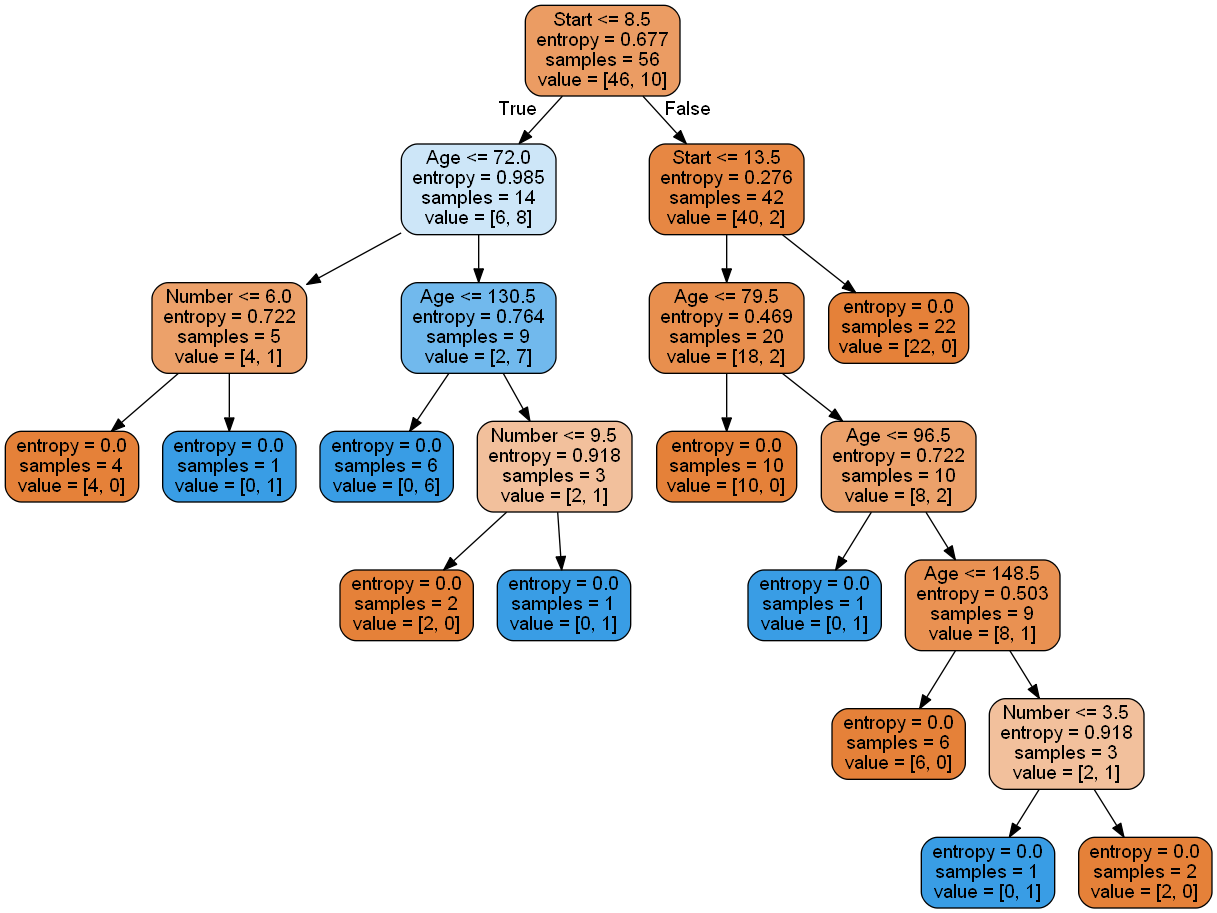

In [24]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names = features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())